<a href="https://www.kaggle.com/abdalrhmanmorsi/employee-future-eda-businesssolutions-prediction?scriptVersionId=88489275" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , plot_confusion_matrix , plot_precision_recall_curve , plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# EDA

In [2]:
df = pd.read_csv("../input/employee-future-prediction/Employee.csv")

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.shape

(4653, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


## Numerical analysis and visualization
Analyzing the "Age"

In [7]:
df['Age'].describe()

count    4653.000000
mean       29.393295
std         4.826087
min        22.000000
25%        26.000000
50%        28.000000
75%        32.000000
max        41.000000
Name: Age, dtype: float64

In [8]:
df['Age'].mean()

29.393294648613796

In [9]:
df['Age'].median()

28.0

<AxesSubplot:>

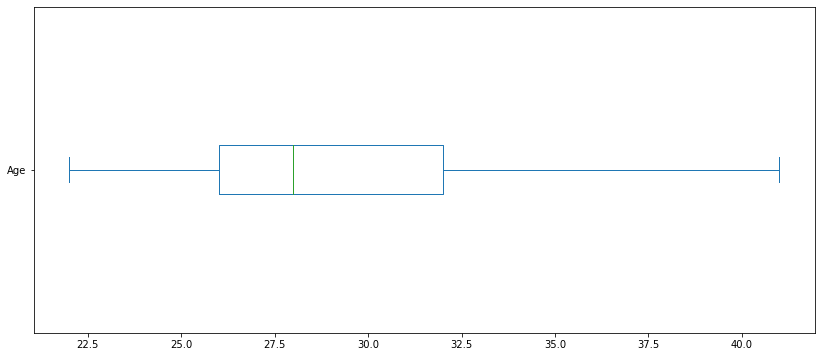

In [10]:
df['Age'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Density'>

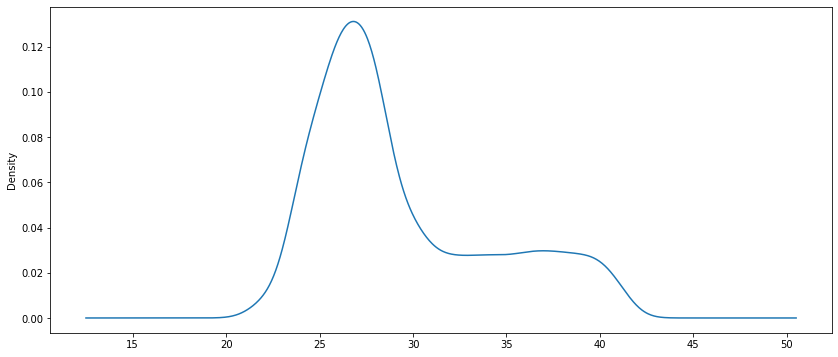

In [11]:
df['Age'].plot(kind='density', figsize=(14,6)) # kde

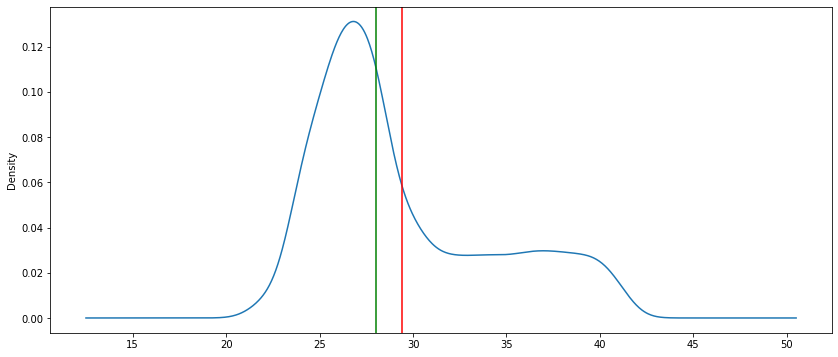

In [12]:
ax = df['Age'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df['Age'].mean(), color='red')
ax.axvline(df['Age'].median(), color='green')

Text(0.5, 0, 'ExperienceInCurrentDomain')

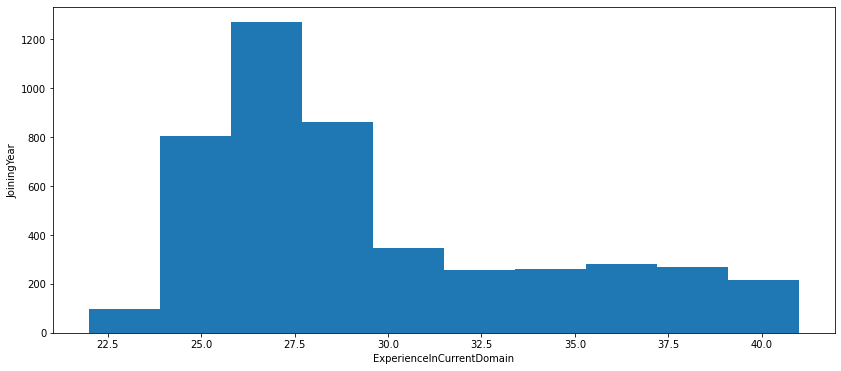

In [13]:
ax = df['Age'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('JoiningYear')
ax.set_xlabel('ExperienceInCurrentDomain')

## Categorical analysis and visualization
ExperienceInCurrentDomain

In [14]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [15]:
df['ExperienceInCurrentDomain'].value_counts()

2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: ExperienceInCurrentDomain, dtype: int64

<AxesSubplot:ylabel='ExperienceInCurrentDomain'>

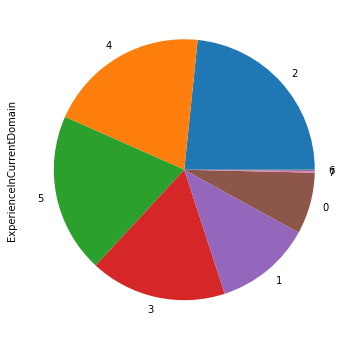

In [16]:
df['ExperienceInCurrentDomain'].value_counts().plot(kind='pie', figsize=(6,6))

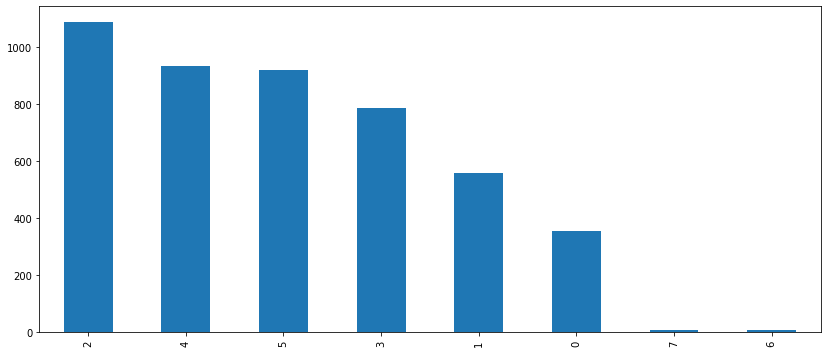

In [17]:
ax = df['ExperienceInCurrentDomain'].value_counts().plot(kind='bar', figsize=(14,6))

## Relationship between the columns?

Paymentier V.S Leave or Not

In [18]:
corr = df.corr()
corr

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


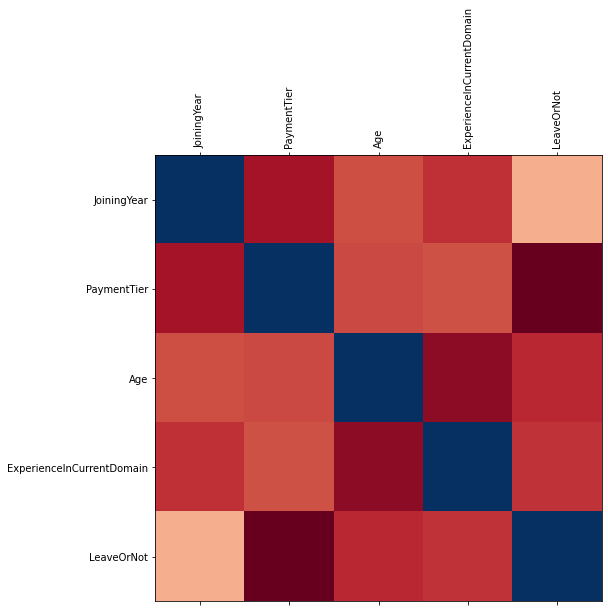

In [19]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [20]:
# Overview of summary (Turnover V.S. Non-turnover)
LeaveOrNot = df.groupby('LeaveOrNot')
LeaveOrNot.mean()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
LeaveOrNot,,,,
0,2014.817884,2.778578,29.571896,2.940059
1,2015.530625,2.545000,29.052500,2.840000


In [21]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
corr

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


In [22]:
degree_freedom = len(df[df['LeaveOrNot']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9614477572217417
The t-distribution right quartile range is: 1.9614477572217413


# Data Preprocessing

## Dealing with data types :¶

In [23]:
df.info()              ## there is 4 features that can be converted from object to int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [24]:
df['Education'].value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [25]:
df['Education'] = df['Education'].map({'PHD': 2, 'Masters': 1, 'Bachelors': 0})
df['Education'].value_counts()

0    3601
1     873
2     179
Name: Education, dtype: int64

In [26]:
df['City'].value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [27]:
df['City'] = df['City'].map({'Bangalore': 2, 'Pune': 1, 'New Delhi': 0})
df['City'].value_counts()

2    2228
1    1268
0    1157
Name: City, dtype: int64

In [28]:
df['Gender'].value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

In [29]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Gender'].value_counts()

1    2778
0    1875
Name: Gender, dtype: int64

In [30]:
df['EverBenched'].value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [31]:
df['EverBenched'] = df['EverBenched'].map({'Yes': 1, 'No': 0})
df['EverBenched'].value_counts()

0    4175
1     478
Name: EverBenched, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Education                  4653 non-null   int64
 1   JoiningYear                4653 non-null   int64
 2   City                       4653 non-null   int64
 3   PaymentTier                4653 non-null   int64
 4   Age                        4653 non-null   int64
 5   Gender                     4653 non-null   int64
 6   EverBenched                4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


## Dealing with missing data :

In [33]:
df.isnull().sum()             ## there is no missing data

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## Dealing with duplicates :

In [34]:
len(df)-len(df.drop_duplicates())

1889

In [35]:
(len(df)-len(df.drop_duplicates()))/len(df)

0.4059746400171932

after inspecting the ratio between the dropped data and the whole data we found out that we would have to drop 40% of our data which will later on affect our model accuracy. So we will not drop the dupulicates.

## Dealing with OutLiers :


Education                       AxesSubplot(0.125,0.657941;0.227941x0.222059)
JoiningYear                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
City                         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
PaymentTier                     AxesSubplot(0.125,0.391471;0.227941x0.222059)
Age                          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Gender                       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
EverBenched                        AxesSubplot(0.125,0.125;0.227941x0.222059)
ExperienceInCurrentDomain       AxesSubplot(0.398529,0.125;0.227941x0.222059)
LeaveOrNot                      AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

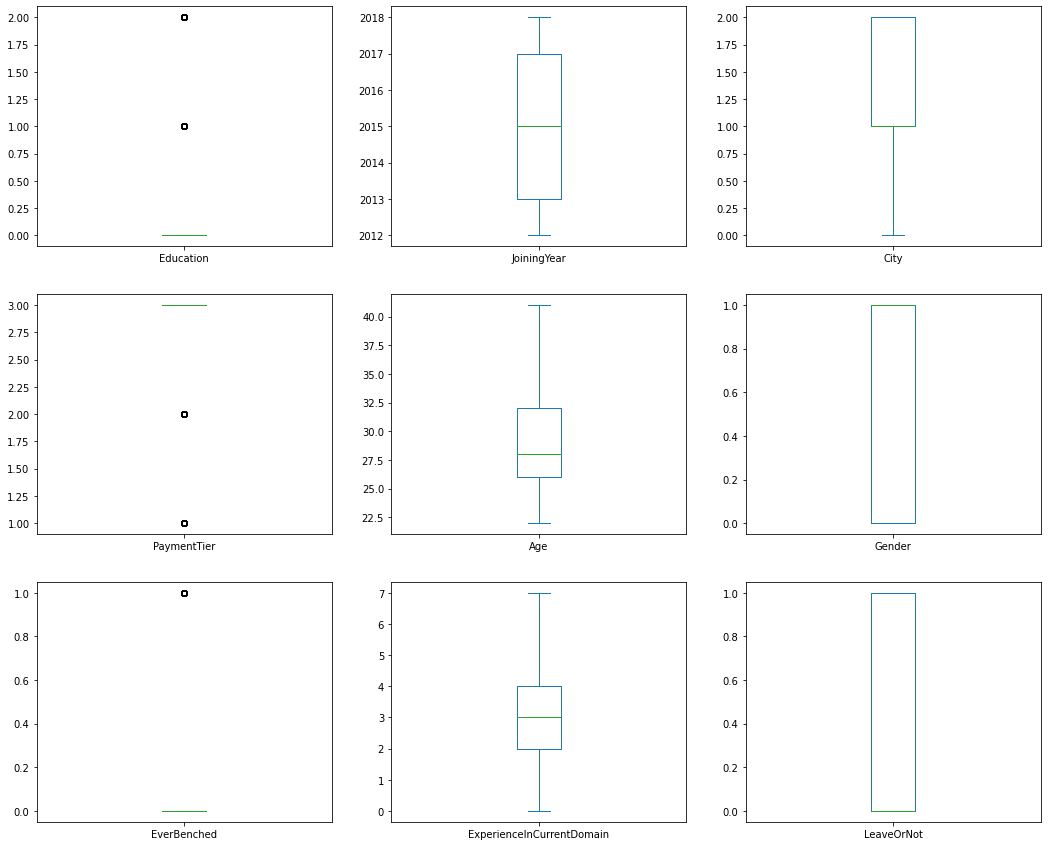

In [36]:
df.plot(kind = "box" , subplots = True , figsize = (18,15) ,  layout = (3,3))

We can't remove or deal with outliers here because we are dealing with a classification set of data so, it makes sense to have outliers present in our data.

# Business Questions

In [37]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,2,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,0,3,38,0,0,2,0
3,1,2016,2,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1


### - What is the ratio between males and females in our company?

<AxesSubplot:>

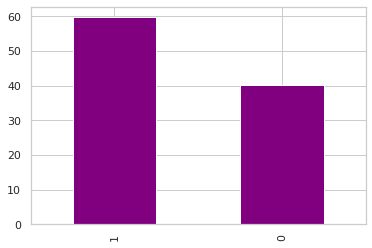

In [38]:
sns.set_theme(style="whitegrid")   # To add lines to the background adding more details
x = round(df['Gender'].value_counts()/df.shape[0]*100,2) # Rounds the value of the percentage of males and females to nearest 2 decimals
x.plot.bar(color ='purple')  # plotting the ratio

The number of males in the company is slightly higher than females 

### What is the ratio between people staying/leaving our company?

<AxesSubplot:ylabel='LeaveOrNot'>

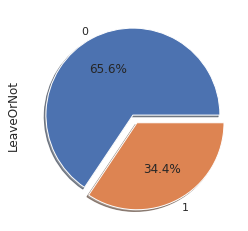

In [39]:
Leave_stay = df['LeaveOrNot'].value_counts()
Leave_stay.plot.pie(autopct = '%1.1f%%',shadow=True ,explode = (0, 0.1))

<AxesSubplot:ylabel='Education'>

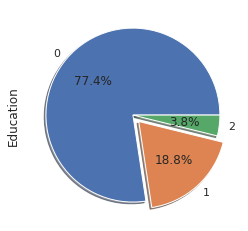

In [40]:
#'PHD': 2, 'Masters': 1, 'Bachelors': 0.
Education_lvl = df['Education'].value_counts()
Education_lvl.plot.pie(autopct = '%1.1f%%',shadow=True ,explode = (0, 0.1, 0))

Expected to have a low percentage of PHDs as it takes 3-7 years to complete

<AxesSubplot:>

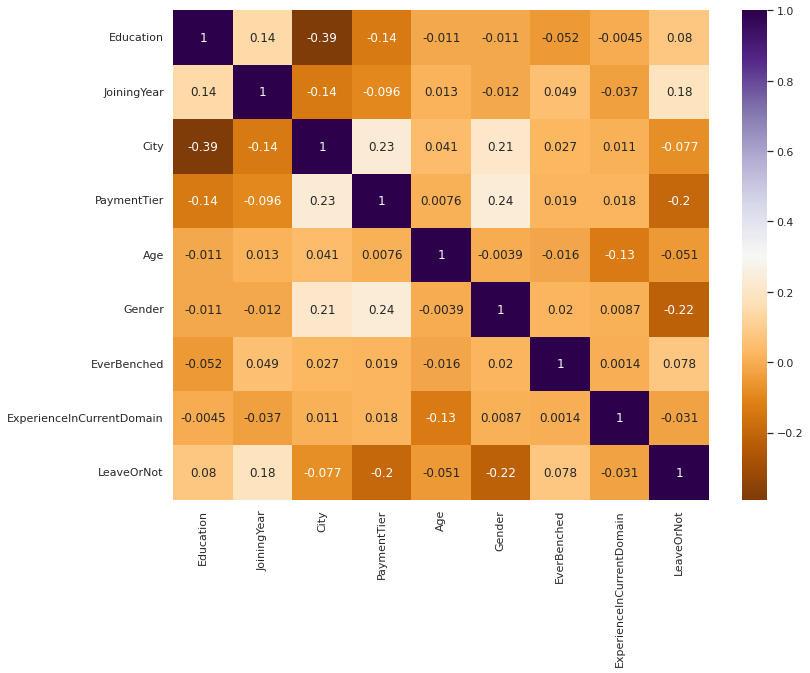

In [41]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True,cmap='PuOr')

No strong relations between columns

### How many payment tiers do we have in our company and what is the ratio between them?

<AxesSubplot:ylabel='PaymentTier'>

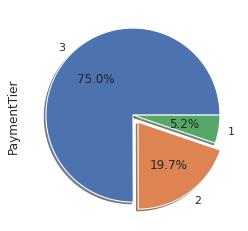

In [42]:
Payment = df['PaymentTier'].value_counts()
Payment.plot.pie(autopct = '%1.1f%%',shadow=True ,explode = (0, 0.1, 0))

### What is the relationship between payment tiers and experience in current domain with respect to leaving or staying in the company?

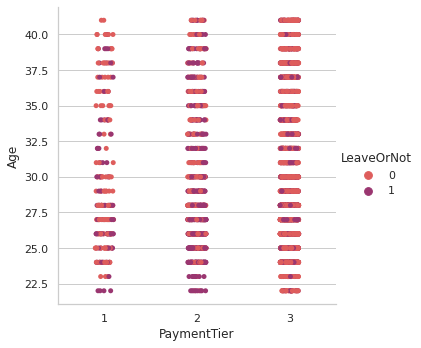

In [43]:
sns.catplot(y="Age", x="PaymentTier",hue="LeaveOrNot",data=df,palette="flare")

More people at age from 22.5 to 26 leave the company in payment tier 2 than any other tier

### What is the relation between joining year and leaving/staying in the company?

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

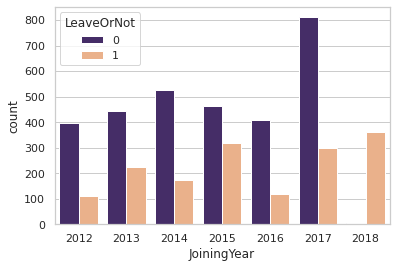

In [44]:
sns.countplot(data=df,x='JoiningYear',hue='LeaveOrNot',palette=['#432371',"#FAAE7B"])

In 2018 most of the employees left which is a bad sign so, we need to review what went wrong this year in particular.

And in 2012 not many employees left the company.

### What is the relation between an employee being benched and him leaving the company?

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

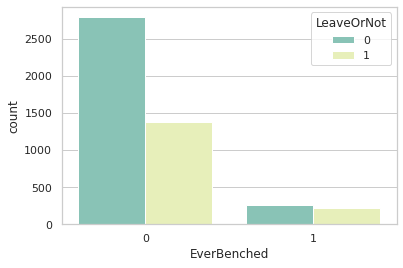

In [45]:
sns.countplot(data=df,x='EverBenched',hue='LeaveOrNot',palette=["#7fcdbb","#edf8b1"])

Most Employees who get benched leave ( approximately 45%)

### What is the relation between the city and an employee leaving our company?

<AxesSubplot:xlabel='City', ylabel='count'>

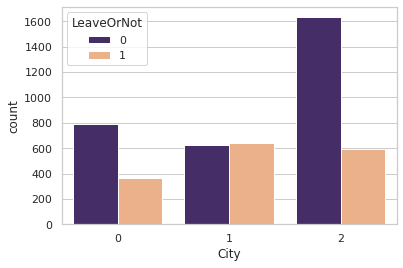

In [46]:
sns.countplot(data = df ,x='City',hue='LeaveOrNot',palette=['#432371',"#FAAE7B"])
# {'Bangalore': 2, 'Pune': 1, 'New Delhi': 0}

Most employees that live in Pune leave (more than 50% of employees living there) and it is also the most city that employees leave our company from followed by Bnagalore then New Delhi.

<AxesSubplot:xlabel='Gender', ylabel='count'>

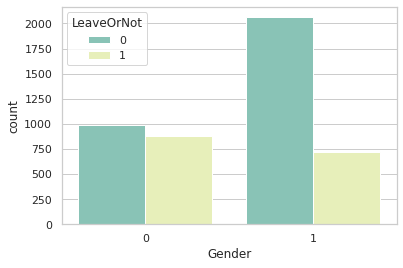

In [47]:
sns.countplot(data = df ,x='Gender',hue='LeaveOrNot',palette=["#7fcdbb","#edf8b1"])

A lot of females tend to leave our company  so, we might have to make the work enviroment easier for them to adapt to.

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

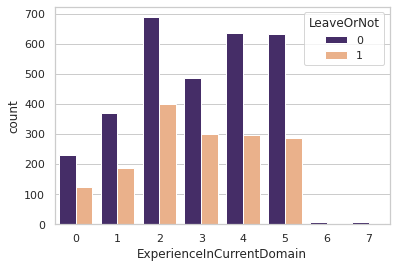

In [48]:
sns.countplot(data = df ,x='ExperienceInCurrentDomain',hue='LeaveOrNot',palette=['#432371',"#FAAE7B"])

Employees with 2 years of experience in their domain are the most to leave.

## Conclusion
#### Pros:
- Not many employees get benched.
- 23% of our employees have a masters degree.
- Not many employees from New Delhi leave our company.

#### Cons:
- A lot of females tend to leave our company.
- No strong relations between our dataset columns (not a business related problem)
- Most employees that live in Pune leave (more than 50% of employees living there)
- More people at age from 22.5 to 26 leave the company in payment tier 2 than any other tier.
- In 2018 most of the employees left.
- Most Employees who get benched leave ( approximately 45%).
- Employees with 2 years of experience in their domain are the most to leave.

#### Business Solution:
- Make the work enviroment more suitable for females to work in.
- Supply employees from Pune more means of transportation.
- Supply employees from Bnagalore more means of transportation.
- Try encourage employees aged from 22 till 26 to stay by rewarding them with bonuses or ranking them up in Payment tiers.
- Review what went wrong in 2018 because nearly all employees left the company. (CRITICAL PROBLEM)
- Try to lower down employee benching rate by rotating more employees in projects.
- Encourage employees with 2 years of experience of stay by invloving them in more projects to gain more experience and also get paid more.

# Modeling

### Split the data

In [49]:
X = df.drop('LeaveOrNot' , axis = 1)
y = df['LeaveOrNot']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Standardization

In [51]:
scaler = StandardScaler()
ss_x_train = scaler.fit_transform(X_train)
ss_x_test  = scaler.transform(X_test)

In [52]:
def Needed_Metrics (model):
    y_pred = model.predict(ss_x_test)
    print('/n')
    print(classification_report(y_test,y_pred))
    print('/n')
    plot_confusion_matrix(model,ss_x_test,y_test)
    plot_roc_curve(model,ss_x_test,y_test)
    plot_precision_recall_curve(model,ss_x_test,y_test)

### KNN Algorithm 

Text(0.5, 1.0, 'Choose the best K Value')

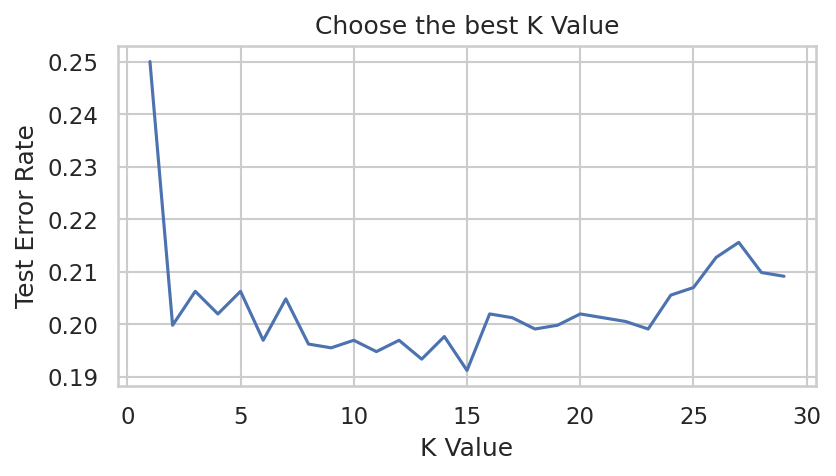

In [53]:
## now we are going to investigate what is the best K value , so we are going to make fore loop to get the best K value : 

test_error_rate = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(ss_x_train , y_train)
    
    y_pred = knn_model.predict(ss_x_test)
    
    error_rate = 1 - accuracy_score(y_test,y_pred)
    
    test_error_rate.append(error_rate)
plt.figure(figsize=(6,3),dpi = 150)
plt.plot(range(1,30), test_error_rate)
plt.xlabel('K Value')
plt.ylabel('Test Error Rate')
plt.title('Choose the best K Value')

In [54]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(ss_x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

/n
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       926
           1       0.83      0.55      0.66       470

    accuracy                           0.81      1396
   macro avg       0.82      0.74      0.76      1396
weighted avg       0.81      0.81      0.80      1396

/n


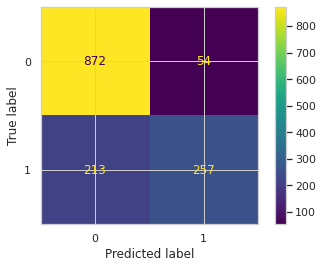

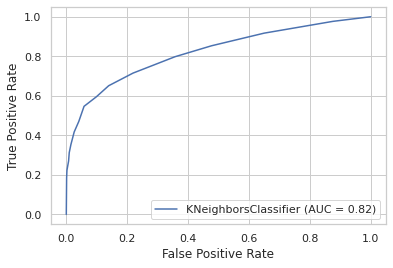

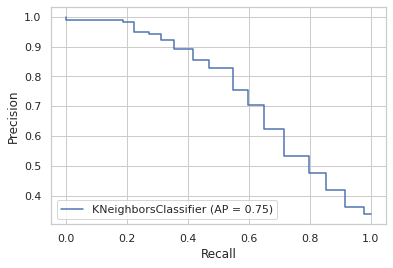

In [55]:
Needed_Metrics(knn_model)

In [56]:
knn_model.score(ss_x_train,y_train)

0.8308259134172551

In [57]:
knn_model.score(ss_x_test,y_test)

0.8087392550143266

### SVM Algorithm

In [58]:
param_grid = {"C":[0.001,0.01,1]}
svc = SVC()
grid_model = GridSearchCV(svc,param_grid)
grid_model.fit(ss_x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 1]})

In [59]:
grid_model.best_params_


{'C': 1}

/n
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       926
           1       0.85      0.57      0.68       470

    accuracy                           0.82      1396
   macro avg       0.83      0.76      0.78      1396
weighted avg       0.83      0.82      0.81      1396

/n


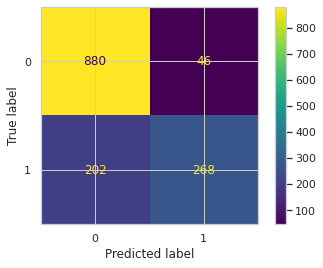

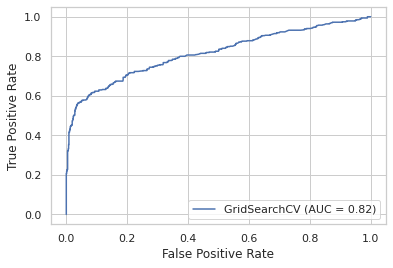

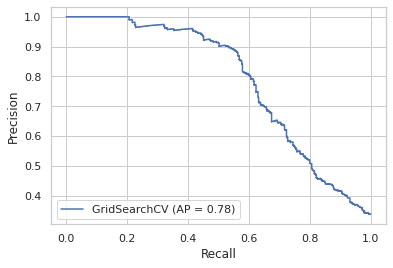

In [60]:
Needed_Metrics(grid_model)